# A1.  Churn analysis initial EDA

What categories or measures are indicators of higher risk for Customer Churn?

A2. Benefit of Analysis

Understanding how categories or measures affect churn can give insight into policies, procedures or mechanisms to implement in order to prevent churn. 


A3. Data Identification

The submission correctly identifies the specific data within the data set that are relevant to addressing the question from part A1.

In [2]:
# Import libraries
# Data Frames and arrays
import pandas as pd
import numpy as np
from numpy import sqrt, random, array, argsort

#Data Visualization
import matplotlib.pyplot as plt
plt.rc('figure', max_open_warning = 0) # remove runtime warning
import seaborn as sns

#Impute
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer


# Load dataset
df = pd.read_csv('C://Users//msmorris//Desktop//Churn_example//churn_raw_data.csv')
df

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.828800,6511.253000,3,2,3,3,4,3,2,3
9996,9997,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,208.856400,5695.952000,4,5,5,4,4,5,2,5
9997,9998,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,168.220900,4159.306000,4,4,4,4,4,4,4,5
9998,9999,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.628600,6468.457000,4,4,6,4,3,3,5,4


In [11]:
# Import libraries
# Data Frames and arrays
import pandas as pd
import numpy as np
from numpy import sqrt, random, array, argsort

#Data Visualization
import matplotlib.pyplot as plt
plt.rc('figure', max_open_warning = 0) # remove runtime warning
import seaborn as sns

#Impute
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer


# Load dataset
df = pd.read_csv('C://Users//msmorris//Desktop//Churn_example//churn_raw_data.csv')

# Remove blank spaces
df = df.replace(" ", "")

# Drop unneeded fields
df = df.drop([ 'Unnamed: 0','CaseOrder', 'Customer_id', 'Interaction', 'Lat', 'Lng', 'Timezone', 'County', 'Zip', 'Area', 'City'], axis = 1)

# Drop Duplicates
df = df.drop_duplicates()

#Impute Missing Values
df['Children'].interpolate(method='linear', direction = 'forward', inplace=True)
df['Age'].interpolate(method='linear', direction = 'forward', inplace=True)
df['Income'].interpolate(method='linear', direction = 'forward', inplace=True)
df['Tenure'].interpolate(method='linear', direction = 'forward', inplace=True)
df['Bandwidth_GB_Year'].interpolate(method='linear', direction = 'forward', inplace=True)
df['Children'].fillna(df['Children'].median(), inplace = True)


imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Techie'] = imp.fit_transform(df[['Techie']])
df['TechSupport'] = imp.fit_transform(df[['TechSupport']])
df['Phone'] = imp.fit_transform(df[['Phone']])
df['Children'].fillna(df['Children'].median(), inplace = True)

#Convert INF to INT
# Convert duration to integer
for col in df:
    if df[col].dtype == 'float':
        df[col] = df[col].astype(int)
        

# rename item fields
col = df.columns.values
item_desc= (['Timely_response', 'Timely_fixes', 'Timely_replacements', 
            'Reliability', 'Options','Respectful_response', 
            'Courteous_exchange', 'Evidence_of_active_listening'])
col[-8:]= item_desc
df.columns = col

# Items_total group
df['items_total'] = (df['Timely_response'] + df['Timely_response'] + 
               df['Timely_fixes']+ df['Timely_replacements']+ 
               df['Reliability']+ df['Options']+
               df['Respectful_response']+ df['Courteous_exchange']+
               df['Evidence_of_active_listening'])

# Create subsets
# Location group
location = df[['State', 'Population']]

# Demographic group
demographic = df[['Job', 'Children', 'Age', 'Education', 'Employment','Income', 'Marital', 'Gender', 'Techie']]

# Products_Services group
products_services = df[['Port_modem','Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity','OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Phone']]
# Network group
network  = df[['Email', 'Contacts', 'Multiple']]

# Experience group
experience = df[['Outage_sec_perweek','Bandwidth_GB_Year','Yearly_equip_failure']]

# Feedback group
feedback = df[['Timely_response', 'Timely_fixes','Timely_replacements', 'Reliability', 'Options', 'Respectful_response',
       'Courteous_exchange', 'Evidence_of_active_listening']]

# Billing group
billing = df[['Contract','PaperlessBilling', 'PaymentMethod']]


#Create subset of data Measures
Measures = (df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 
                 'Yearly_equip_failure', 'Tenure','MonthlyCharge','Bandwidth_GB_Year', 'Timely_response', 'Timely_fixes',
                 'Timely_replacements', 'Reliability', 'Options', 'Respectful_response', 'Courteous_exchange', 
                 'Evidence_of_active_listening']])

# Create a subset of data Meas_Churn
Meas_Churn = (df[['Churn','Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 
                 'Yearly_equip_failure', 'Tenure','MonthlyCharge','Bandwidth_GB_Year', 'Timely_response', 'Timely_fixes',
                 'Timely_replacements', 'Reliability', 'Options', 'Respectful_response', 'Courteous_exchange', 
                 'Evidence_of_active_listening']])
Categories = (df[['Contract','PaperlessBilling', 'PaymentMethod','Timely_response', 'Timely_fixes',
                  'Timely_replacements', 'Reliability', 'Options', 'Respectful_response','Courteous_exchange', 
                  'Evidence_of_active_listening','Outage_sec_perweek','Bandwidth_GB_Year','Yearly_equip_failure',
                  'Email', 'Contacts', 'Multiple','Port_modem','Tablet', 'InternetService', 'Phone', 'Multiple',
                  'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                  'StreamingMovies', 'Phone', 'Job', 'Children', 'Age', 'Education', 'Employment','Income', 
                  'Marital', 'Gender', 'Techie','State']])
# Read of Main dataset
Meas_Churn.shape

(10000, 19)

B1. Justification

The Chosen method of Analysis is to review data using univariate statistic over 2 subsets of data. One subset will contain all Measures and the other all categorical data. I will review standard distributional data along with Skey and Kurt points. Finally I will run a loop to evaluate the data in boxplots and distribution plots for measures data and heatmap for categorical data. 

The other approach will be to review entire dataset in a bivariate analysis using Anova to review p value and effect size. This will help to determine what relationships might prove valuable to look further into. 

I have chosen the univariate method to understand the distribution of data using histograms to get an overview and boxplots for more detail. The categorial review is reflected with Churn heamaps or chi square has assisted with this this is to see how the categorical data relates to churn. 

For bivariate stats I was after a combination of high p-values and effect sizes in order to determine a strong relationship and impact to Churn. 


C1. Univariate Statistics
The submission accurately identifies the distribution of 2 continuous and 2 categorical variables using univariate statistics. 

In [12]:
def unistats(df):
    #create headers
    output_df = pd.DataFrame(columns =['Count','Missing', 'Unique', 'Dtype', 'Numeric', 'Mode', 'Mean', 'Min',
                                       '25%', 'Median', '75%','Max', 'Std', 'Skew', 'Kurt'])
    
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(),df[col].isnull,df[col].nunique(),df[col].dtype, pd.api.types.is_numeric_dtype(df[col]),
                                 df[col].mode().values[0],df[col].mean(),df[col].min(),df[col].quantile(0.25),df[col].median(),
                                 df[col].quantile(0.75),df[col].max(),df[col].std(),df[col].skew(),df[col].kurt()]
        else:
            output_df.loc[col] = [df[col].count(),df[col].isnull,df[col].nunique(),df[col].dtype, pd.api.types.is_numeric_dtype(df[col]),
                                  '','','','','','','','','','']
    return output_df.sort_values(by=['Numeric','Skew','Unique'], ascending = False)
unistats(df)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Outage_sec_perweek,10000,<bound method Series.isnull of 0 6\n1 ...,41,int32,True,9,10.9471,-1,8.0,10.0,12.0,47,7.032258,2.955881,9.621766
Population,10000,<bound method Series.isnull of 0 38\n...,5933,int64,True,0,9756.5624,0,738.0,2910.5,13168.0,111850,14432.698671,2.205008,5.516785
Yearly_equip_failure,10000,<bound method Series.isnull of 0 1\n1 ...,6,int64,True,0,0.398,0,0.0,0.0,1.0,6,0.635953,1.660304,3.1031
Income,10000,<bound method Series.isnull of 0 28561\n...,9387,int32,True,2842,40099.934,740,20710.0,34377.0,53027.25,258900,26748.908155,1.43143,3.362082
Children,10000,<bound method Series.isnull of 0 1\n1 ...,11,int32,True,1,2.0378,0,1.0,1.0,3.0,10,2.04034,1.428476,2.243293
Contacts,10000,<bound method Series.isnull of 0 0\n1 ...,8,int64,True,0,0.9942,0,0.0,1.0,2.0,7,0.988466,0.981662,1.058689
MonthlyCharge,10000,<bound method Series.isnull of 0 171\n1 ...,215,int32,True,162,173.5834,77,141.0,169.0,203.0,315,43.336583,0.381137,-0.446153
Respectful_response,10000,<bound method Series.isnull of 0 4\n1 ...,8,int64,True,3,3.4973,1,3.0,3.0,4.0,8,1.033586,0.075986,-0.152186
Tenure,10000,<bound method Series.isnull of 0 6\n1 ...,70,int32,True,2,33.9903,1,7.0,35.0,61.0,71,26.393247,0.066478,-1.771639
Bandwidth_GB_Year,10000,<bound method Series.isnull of 0 904\n1...,4291,int32,True,5640,3393.9805,155,1238.0,3287.0,5583.0,7158,2185.665808,0.065737,-1.713805


C2 Visual Findings

The submission accurately represents the distribution of the variables in part C.

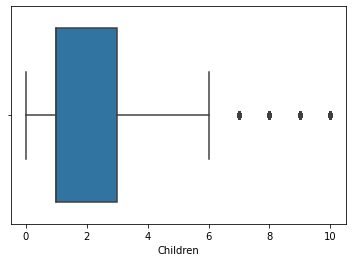

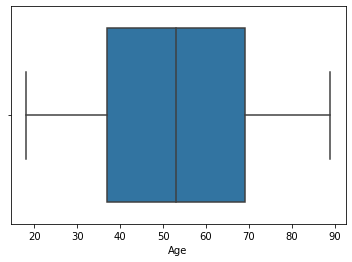

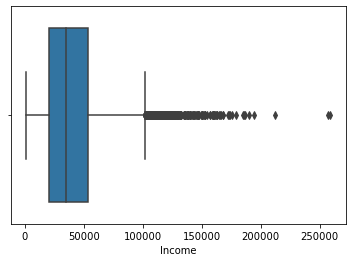

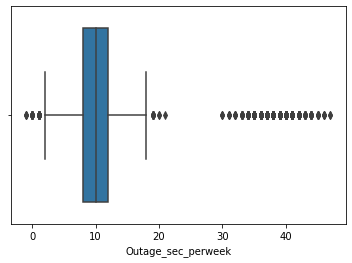

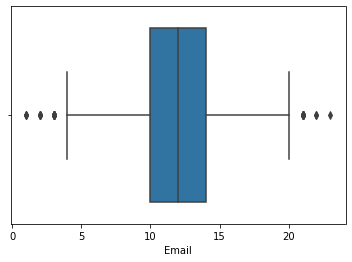

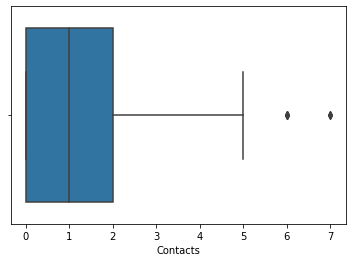

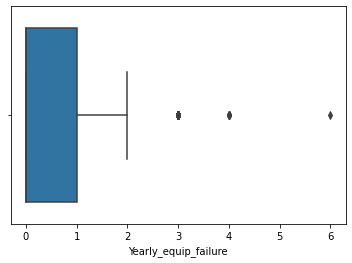

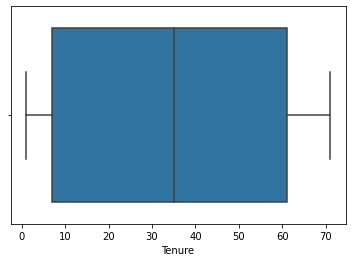

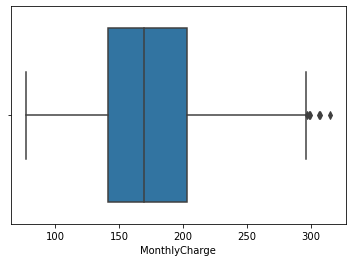

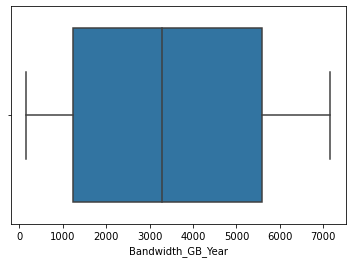

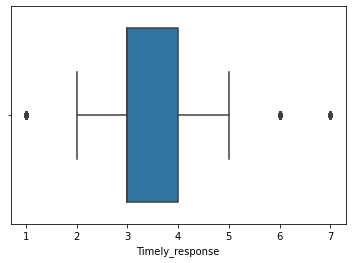

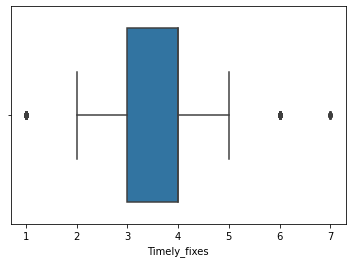

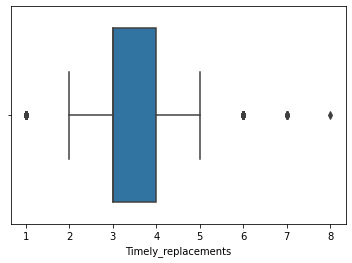

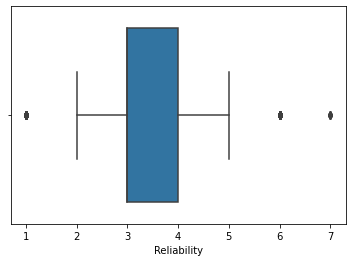

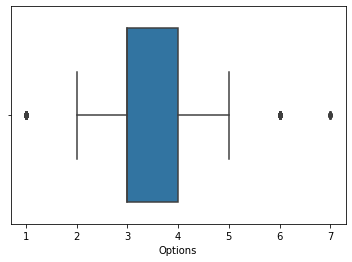

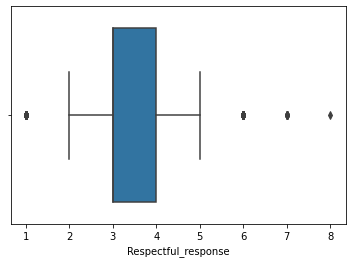

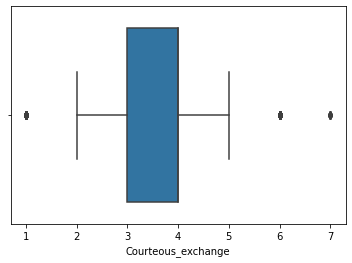

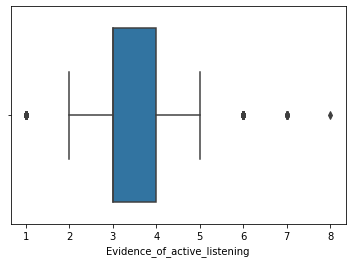

In [13]:
for column in Measures:
    plt.figure()    
    sns.boxplot(data = Measures, x =column);

<Figure size 432x288 with 0 Axes>

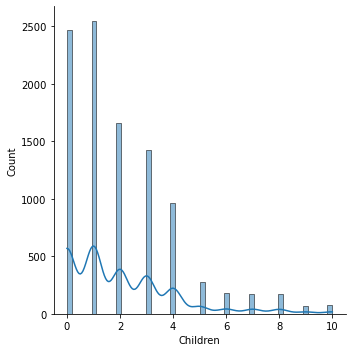

<Figure size 432x288 with 0 Axes>

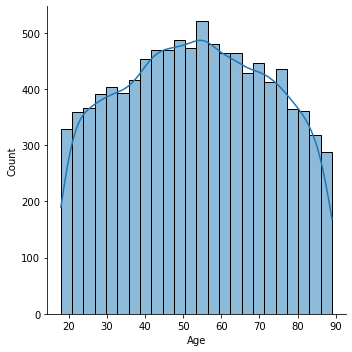

<Figure size 432x288 with 0 Axes>

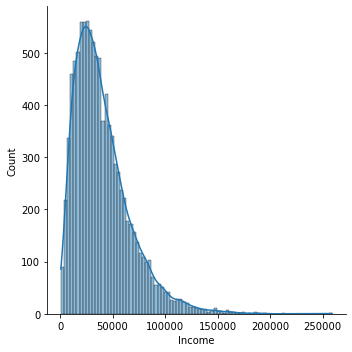

<Figure size 432x288 with 0 Axes>

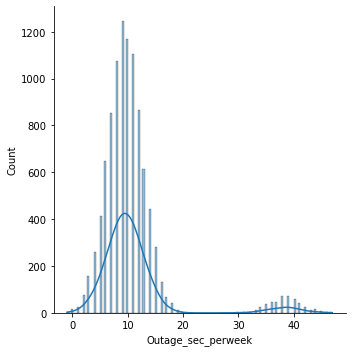

<Figure size 432x288 with 0 Axes>

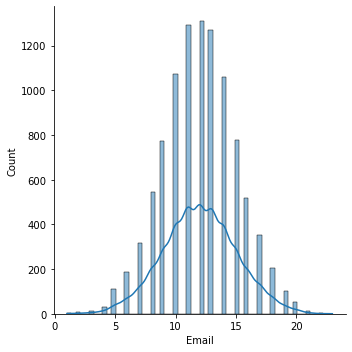

<Figure size 432x288 with 0 Axes>

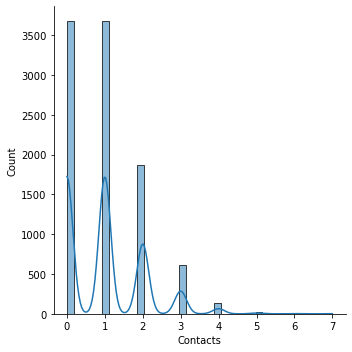

<Figure size 432x288 with 0 Axes>

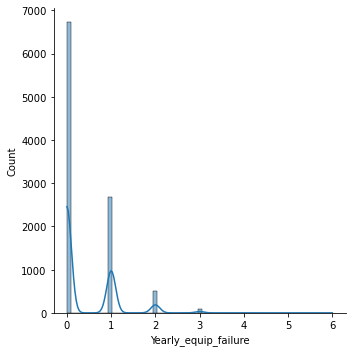

<Figure size 432x288 with 0 Axes>

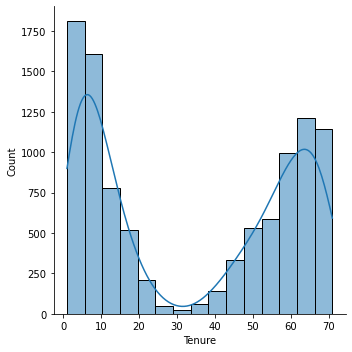

<Figure size 432x288 with 0 Axes>

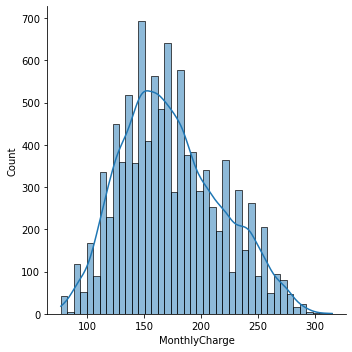

<Figure size 432x288 with 0 Axes>

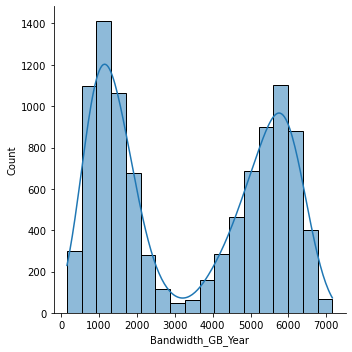

<Figure size 432x288 with 0 Axes>

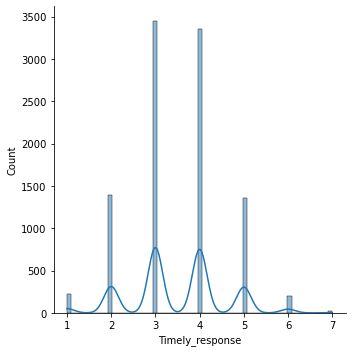

<Figure size 432x288 with 0 Axes>

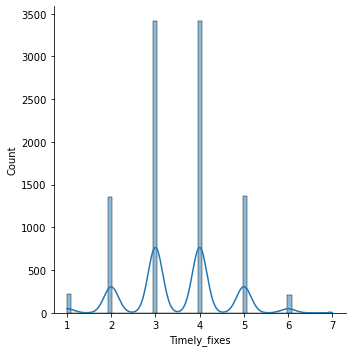

<Figure size 432x288 with 0 Axes>

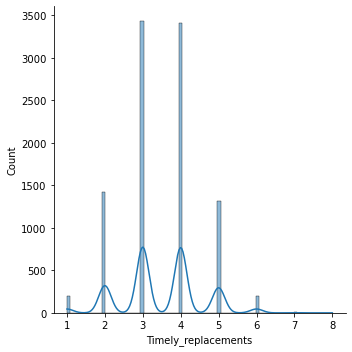

<Figure size 432x288 with 0 Axes>

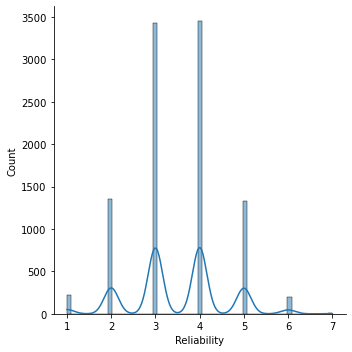

<Figure size 432x288 with 0 Axes>

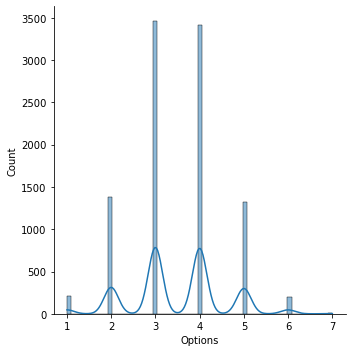

<Figure size 432x288 with 0 Axes>

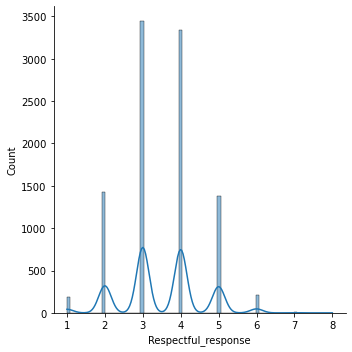

<Figure size 432x288 with 0 Axes>

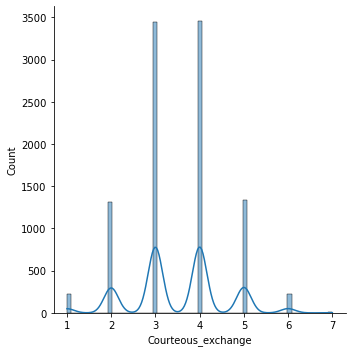

<Figure size 432x288 with 0 Axes>

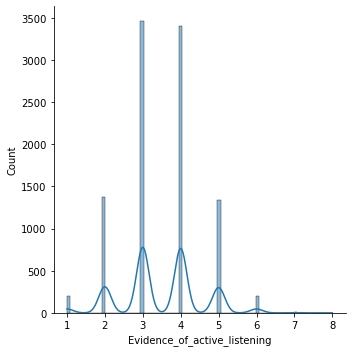

In [4]:
for column in Measures:
    plt.figure()    
    sns.displot(data = Measures, x =column, kde = True);

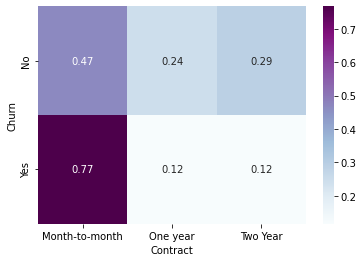

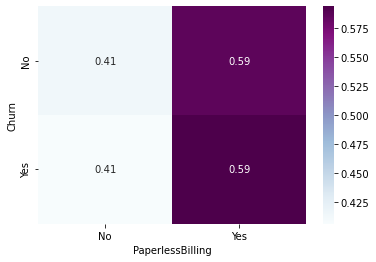

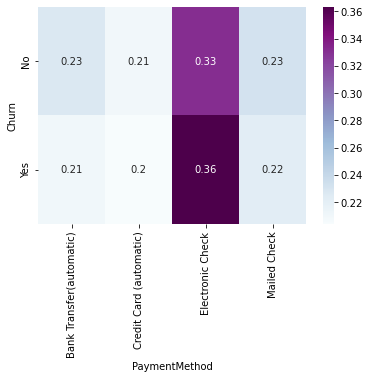

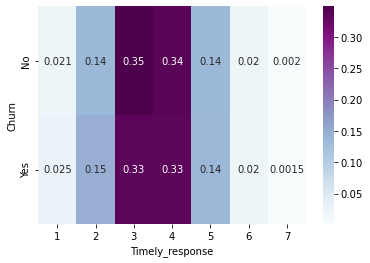

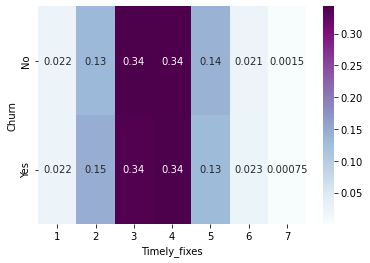

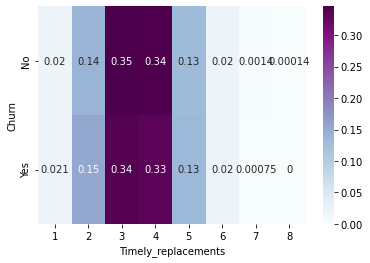

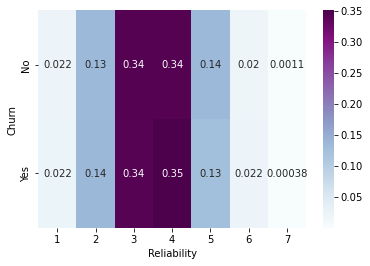

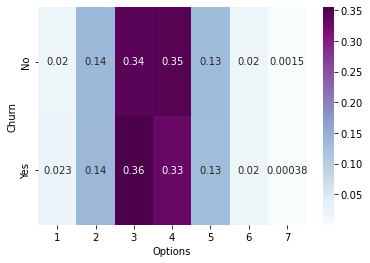

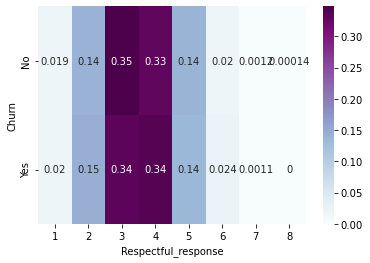

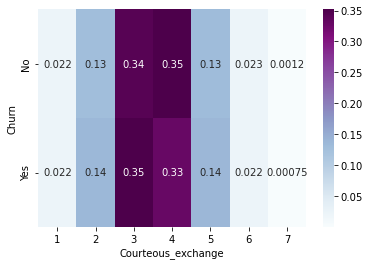

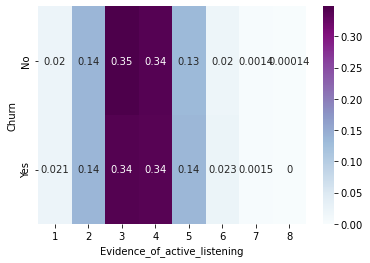

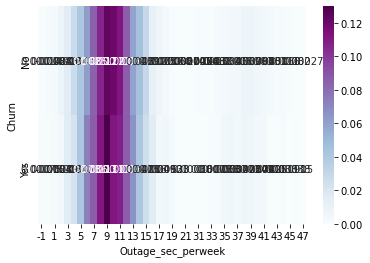

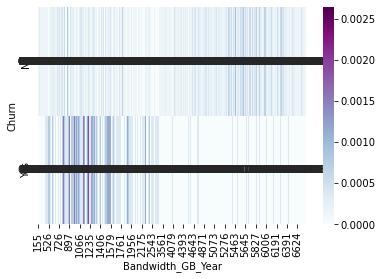

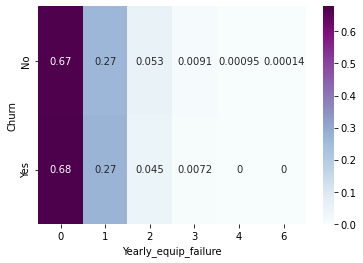

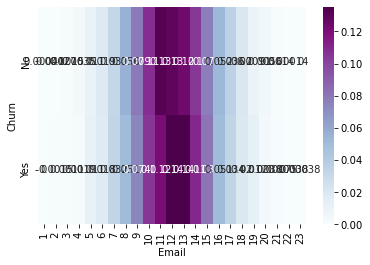

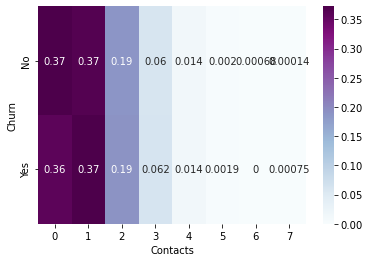

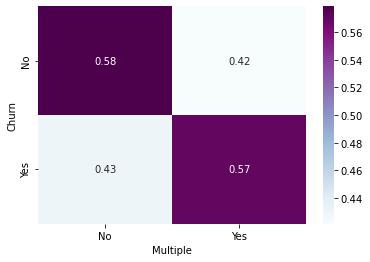

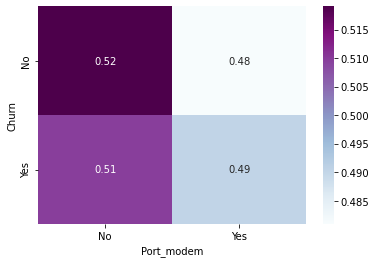

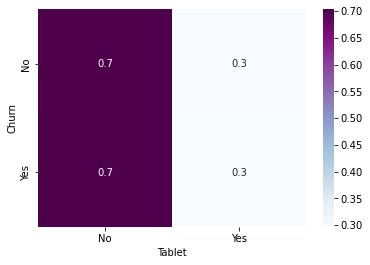

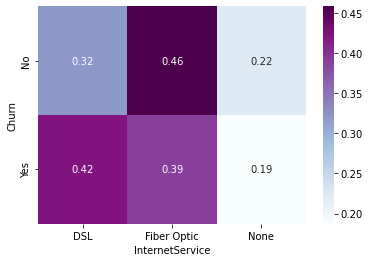

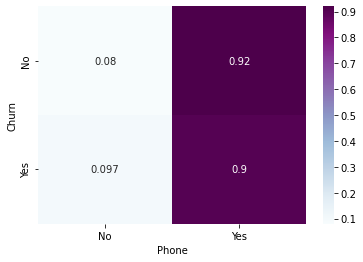

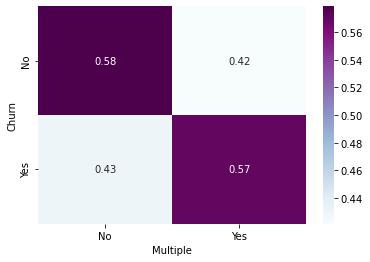

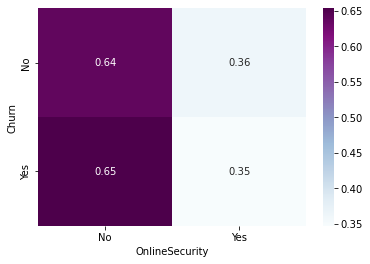

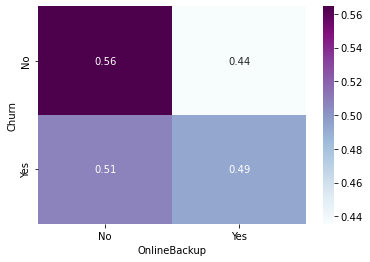

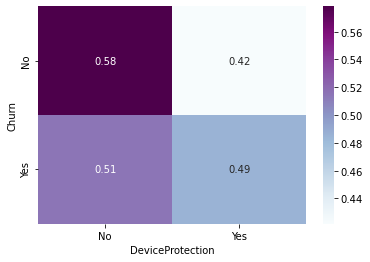

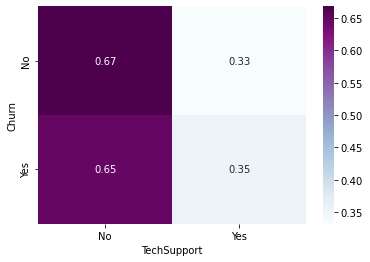

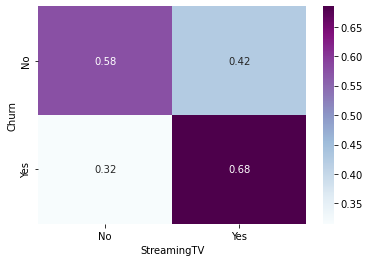

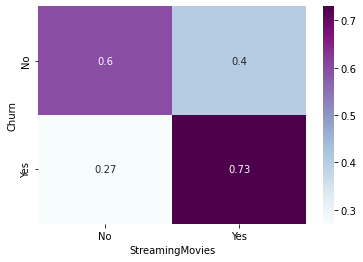

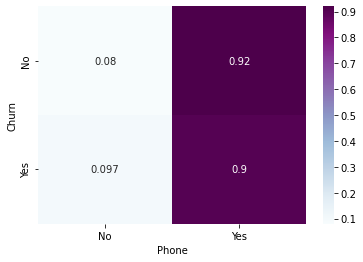

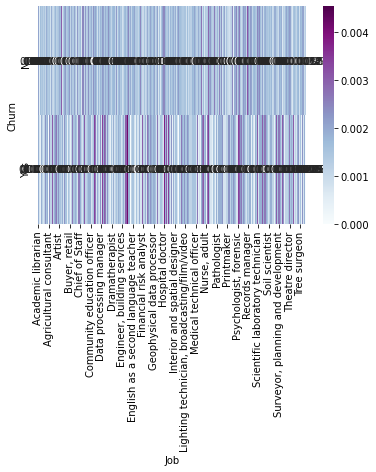

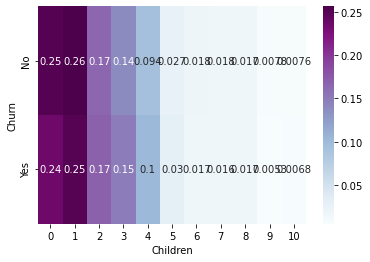

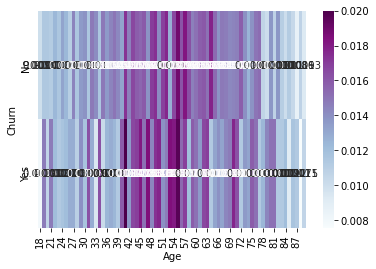

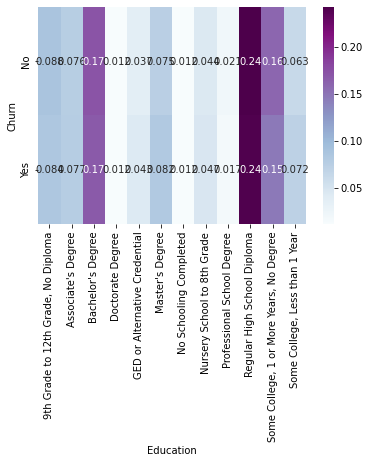

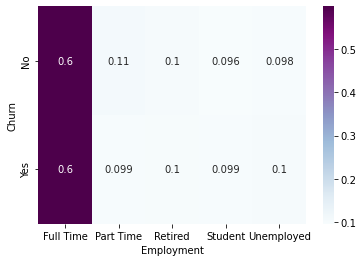

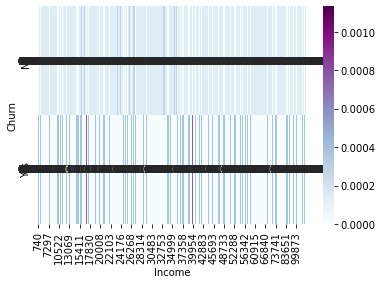

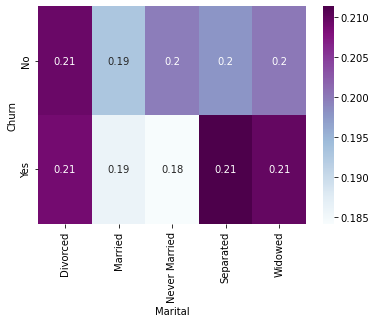

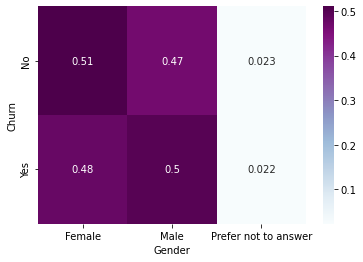

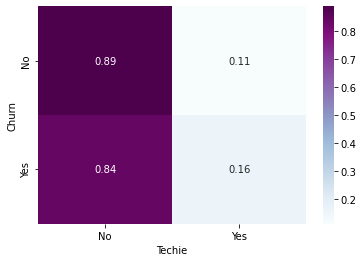

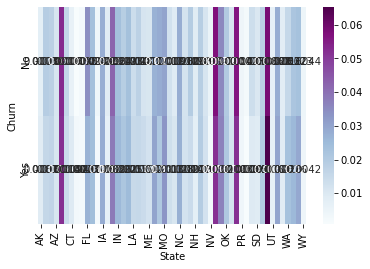

In [5]:
for column in Categories:
    cont_pct = pd.crosstab(df['Churn'], df[column], normalize = 'index')
    plt.figure()    
    sns.heatmap(cont_pct, annot = True, cmap ="BuPu" );
    
# reference https://python-bloggers.com/2020/09/how-to-run-chi-square-test-in-python/

D1 Bivariate Statistics


In [6]:
def bivstats(df, label):
    from scipy import stats
    import pandas as pd
    import numpy as np
    
    #Create Empty dataframe to store output
    output_df = pd.DataFrame(columns=['r', 'F', 'X2', 'p-value'])
    
    for col in df:
        if not col == label:
            if df[col].isnull().sum()==0:
                if pd.api.types.is_numeric_dtype(df[col]): # only calculate r, p-value for the numeric 
                    r, p = stats.pearsonr(df[label], df[col])
                    output_df.loc[col] = [round(r,3), np.nan, np.nan, round(p,6)]
            else:
                output_df.loc[col] = [np.nan, np.nan, np.nan, 'nulls']
    return output_df.reindex(output_df.r.abs().sort_values(ascending = False).index)
bivstats(df, 'Tenure')

,r,F,X2,p-value
Bandwidth_GB_Year,0.981,NaN,NaN,0.000000
Options,0.023,NaN,NaN,0.020861
Evidence_of_active_listening,-0.017,NaN,NaN,0.081779
Email,-0.013,NaN,NaN,0.202929
Yearly_equip_failure,0.013,NaN,NaN,0.204518
Children,-0.012,NaN,NaN,0.225822
Respectful_response,-0.009,NaN,NaN,0.366060
Outage_sec_perweek,0.008,NaN,NaN,0.399068
Timely_response,-0.006,NaN,NaN,0.579101
Reliability,-0.006,NaN,NaN,0.577361


In [14]:
def anova(df, feature, label):
    import pandas as pd
    import numpy as np
    from scipy import stats
    # use the unique() to generate a list of unique values in catigorical column
    groups = df[feature].unique()
    # print(groups)
    df_grouped = df.groupby(feature)
    #print(df_grouped)
    group_labels = []
    for g in groups:
        g_list = df_grouped.get_group(g)
        #print(g_list)
        group_labels.append(g_list[label])
    #print(group_labels)
    return stats.f_oneway(*group_labels)

In [8]:
def bivstats(df, label):
    from scipy import stats
    import pandas as pd
    import numpy as np
    
    global output_df
    #Create Empty dataframe to store output
    output_df = pd.DataFrame(columns=['Stat','r(+/1)', 'Effect Size','p-value'])
    
    for col in df:
        if not col == label:
            if df[col].isnull().sum()==0:
                if pd.api.types.is_numeric_dtype(df[col]): # only calculate r, p-value for the numeric 
                    r, p = stats.pearsonr(df[label], df[col])
                    output_df.loc[col] = ['r', np.sign(r), abs(round(r,3)), round(p,6)]
                else:
                    F, p = anova(df[[col, label]], col, label)
                    output_df.loc[col] =  ['F', '', round(F,3), round(p,6)]
                    
            else:
                output_df.loc[col] = [np.nan, np.nan, np.nan, np.nan]
                
    return output_df.sort_values(by=['Stat','Effect Size'], ascending = [False, False])
bivstats(df, 'Tenure')

,Stat,r(+/1),Effect Size,p-value
Bandwidth_GB_Year,r,1.0,0.981,0.000000
Options,r,1.0,0.023,0.020861
Evidence_of_active_listening,r,-1.0,0.017,0.081779
Email,r,-1.0,0.013,0.202929
Yearly_equip_failure,r,1.0,0.013,0.204518
Children,r,-1.0,0.012,0.225822
Respectful_response,r,-1.0,0.009,0.366060
Outage_sec_perweek,r,1.0,0.008,0.399068
Timely_response,r,-1.0,0.006,0.579101
Reliability,r,-1.0,0.006,0.577361


In [9]:
def heteroscedasticity(df, feature, label ):
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    from statsmodels.stats.diagnostic import het_breuschpagan
    from statsmodels.stats.diagnostic import het_white
    # Fit the OLS model : ols(formula = '[label]~[feature], data=df').fit()
    model = ols(formula =(label + '~' + feature), data= df).fit()
    
    white_test = het_white(model.resid, model.model.exog)
    bp_test = het_breuschpagan(model.resid, model.model.exog)
    
    output_df = pd.DataFrame(columns = ['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
    output_df.loc['White'] = white_test
    output_df.loc['Br-Pa']= bp_test
    return output_df.round(3)
    
   
def scatter(feature,label):
    from scipy import stats
    # Create Legend
    m, b, r, p, err = stats.linregress(feature, label)
    textstr = 'y  = ' + str(round(m,2)) +'x+ ' + str(round(b,2)) + '\n'
    textstr += 'r2 = ' + str(round(r**2,2)) +'\n'
    textstr += 'p  = ' + str(round(p,2)) +'\n'
    textstr += str(feature.name) + ' skew = ' + str(round(feature.skew(),2)) + '\n'
    textstr += str(label.name) + ' skew = ' + str(round(label.skew(),2)) + '\n'+'\n'
    textstr += str(heteroscedasticity(pd.DataFrame(label).join(pd.DataFrame(feature)), feature.name, label.name))
    
    sns.set(color_codes=True)
    ax = sns.jointplot(feature, label, kind = 'reg')
    ax.fig.text(1, 0.114, textstr, fontsize=12, transform=plt.gcf().transFigure)
    plt.show()
#scatter(df.Tenure, df.Bandwidth_GB_Year)

D2 Visual Findings

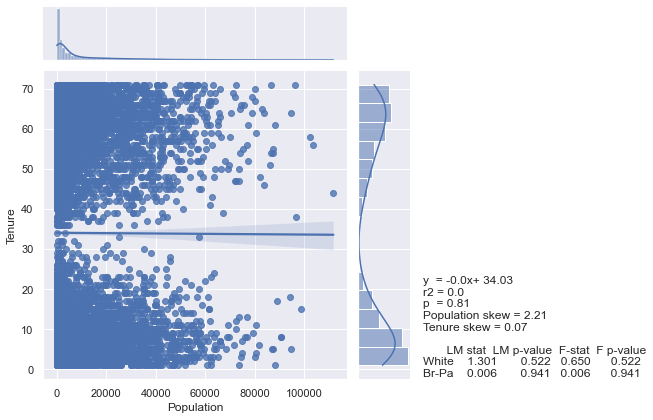

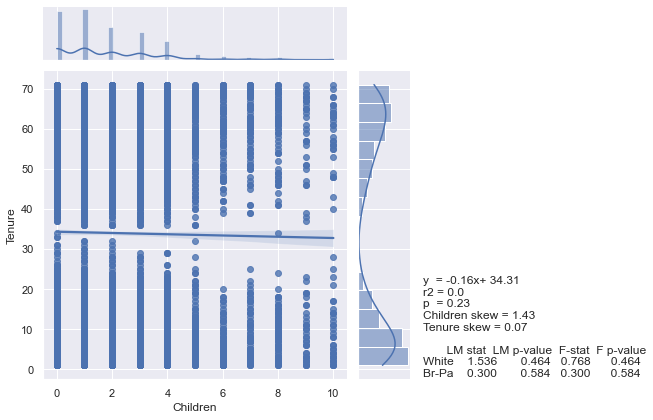

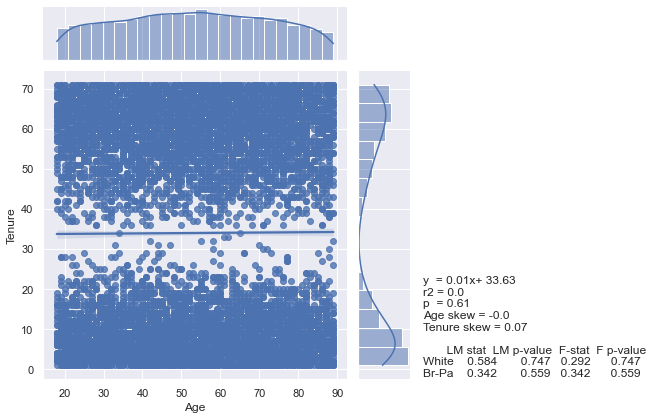

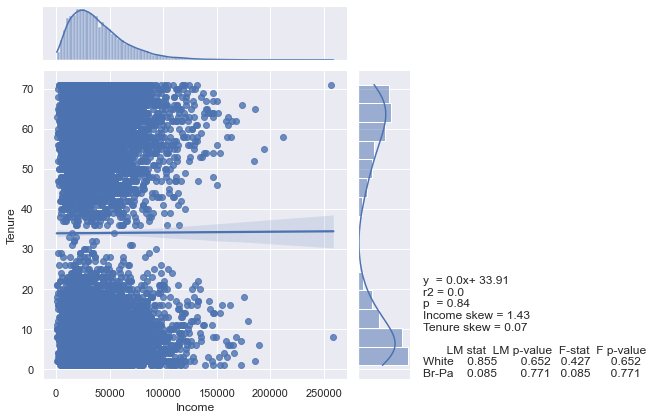

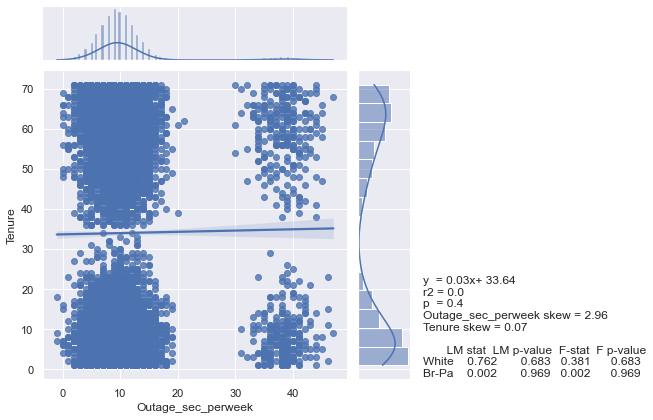

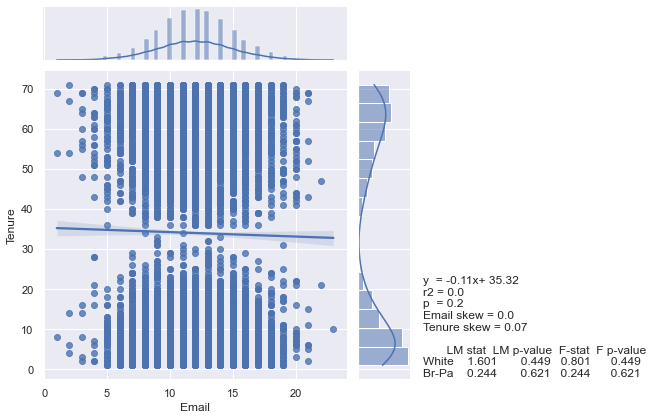

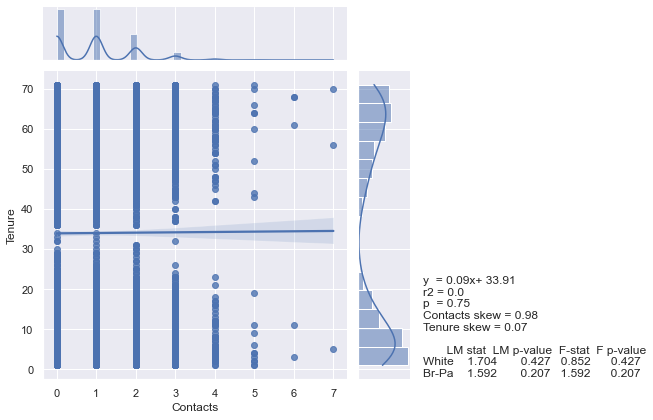

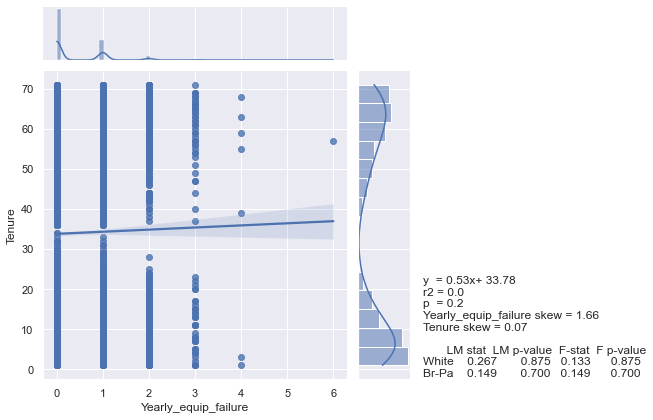

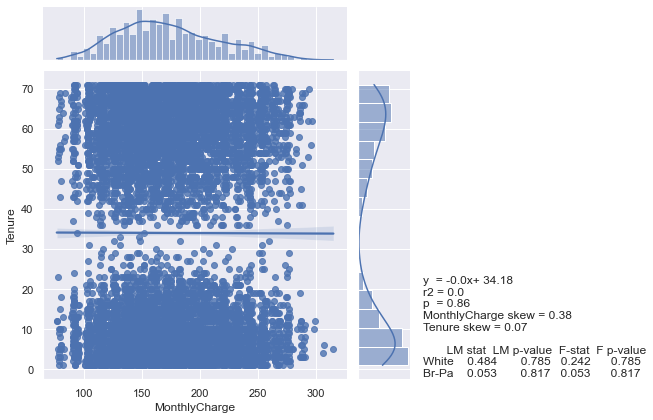

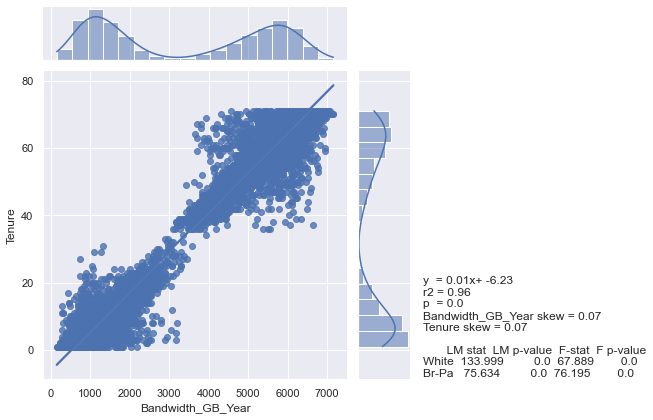

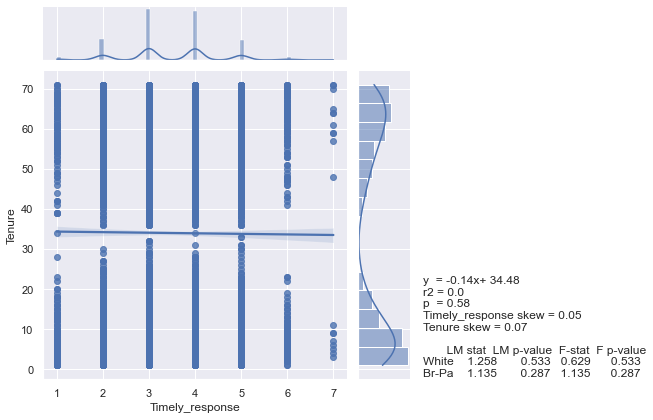

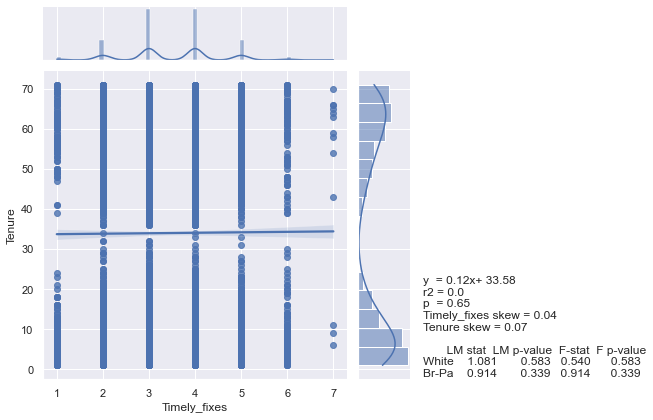

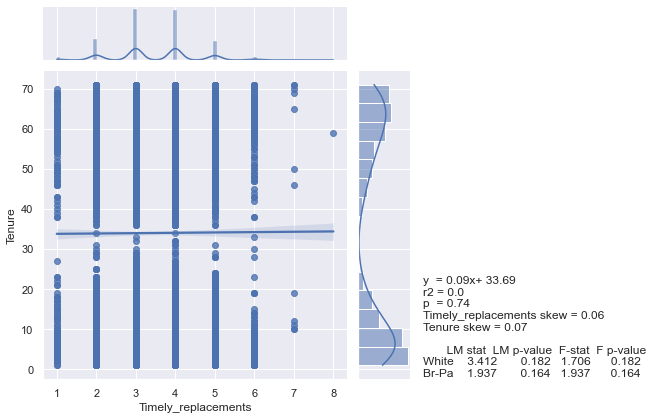

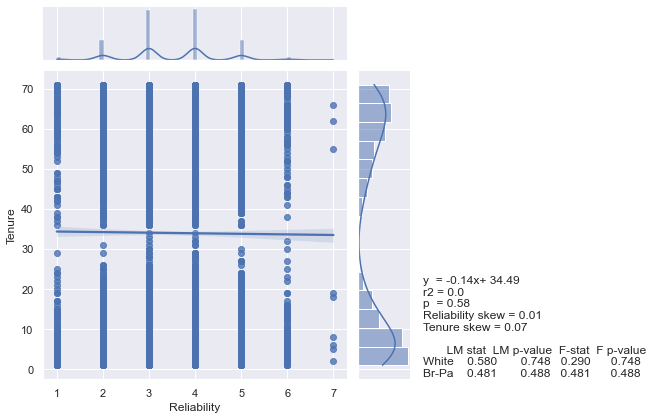

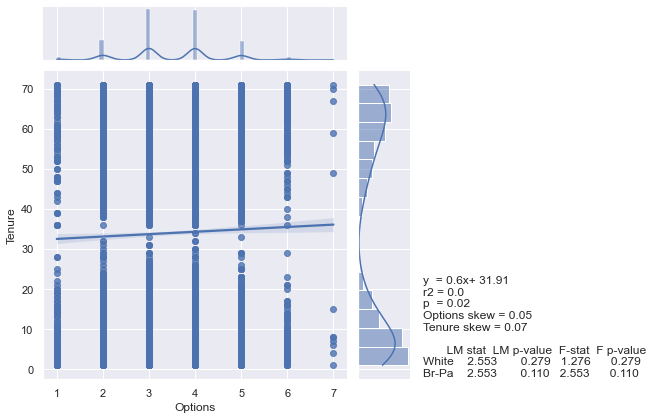

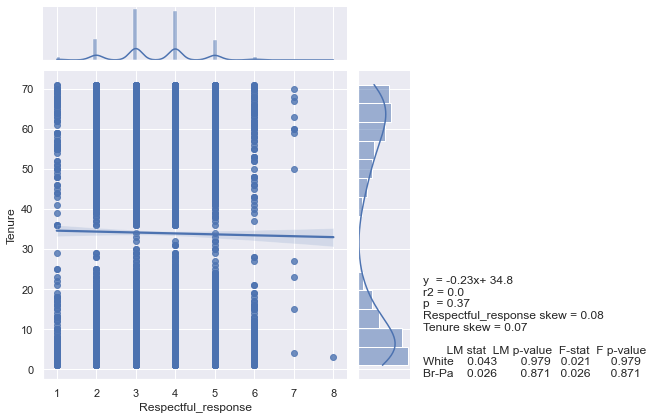

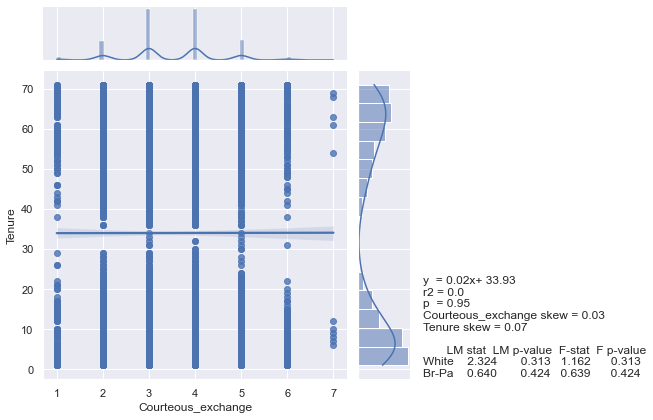

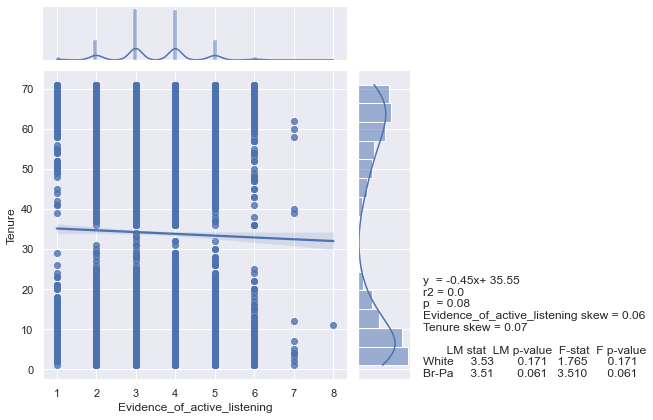

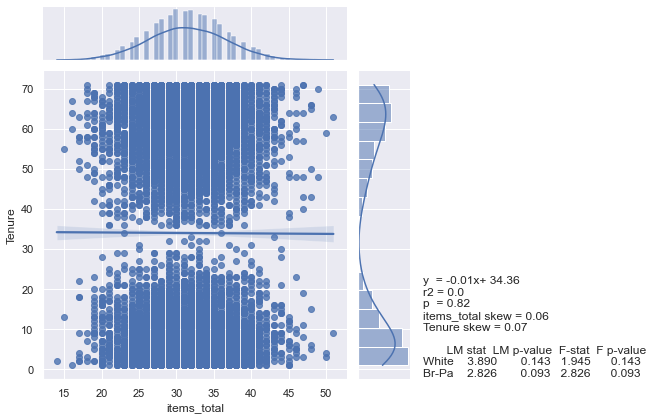

,Stat,r(+/1),Effect Size,p-value
Bandwidth_GB_Year,r,1.0,0.981,0.000000
Options,r,1.0,0.023,0.020861
Evidence_of_active_listening,r,-1.0,0.017,0.081779
Email,r,-1.0,0.013,0.202929
Yearly_equip_failure,r,1.0,0.013,0.204518
Children,r,-1.0,0.012,0.225822
Respectful_response,r,-1.0,0.009,0.366060
Outage_sec_perweek,r,1.0,0.008,0.399068
Timely_response,r,-1.0,0.006,0.579101
Reliability,r,-1.0,0.006,0.577361


In [11]:
# remove insignificat xy warning
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
def bivstats(df, label):
    from scipy import stats
    import pandas as pd
    import numpy as np
    
    #Create Empty dataframe to store output
    output_df = pd.DataFrame(columns=['Stat','r(+/1)', 'Effect Size','p-value'])
    
    for col in df:
        if not col == label:
            if df[col].isnull().sum()==0:
                if pd.api.types.is_numeric_dtype(df[col]): # only calculate r, p-value for the numeric 
                    r, p = stats.pearsonr(df[label], df[col])
                    output_df.loc[col] = ['r', np.sign(r), abs(round(r,3)), round(p,6)]
                    scatter(df[col], df[label])
                else:
                    F, p = anova(df[[col, label]], col, label)
                    output_df.loc[col] =  ['F', '', round(F,3), round(p,6)]
                    
            else:
                output_df.loc[col] = [np.nan, np.nan, np.nan, np.nan]
                
    return output_df.sort_values(by=['Stat','Effect Size'], ascending = [False, False])
    plt.show()
bivstats(df, 'Tenure')

In [12]:
def bar_chart(df, feature, label):
    import pandas as pd
    from scipy import stats
    from matplotlib import pyplot as plt
    
    means = df.groupby(feature).mean()[label].round(2)
    
    plt.bar(df.groupby(feature).groups.keys(),means)
    plt.title(label + " by " + feature)
    plt.xlabel(feature)
    plt.ylabel(label)
    
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_labels = []
    for g in groups:
        g_list = df_grouped.get_group(g)
        group_labels.append(g_list[label])
    
    #ANOVA
    oneway = stats.f_oneway(*group_labels)
    
    #t-test
    unique_groups = df[feature].unique()
    ttests = []
    
    for i, group in enumerate(unique_groups):
        for i2, group_2 in enumerate(unique_groups):
            if i2 >i:
                type_1 = df[df[feature] == group]
                type_2 = df[df[feature] == group_2]
                # There must be more than 1 case per gorup to perform a t-test
                if len(type_1[label]) < 2 or len(type_2[label]) <2:
                    print("''" + group + "''", str(len(type_1)) + "; '" + group_2 + "' n -'" +str(len(type_2)) + "; no t-test performed")
                else:
                    t, p = stats.ttest_ind(type_1[label], type_2[label])
                    ttests.append([group, group_2, t.round(4), p.round(4)])
                
    p_threshold = 0.05 / len(ttests)  # bonferroni- corrected p- value determined
    
    # add all descriptive statistics to the diagram
    textstr = '          ANOVA'  + '\n'
    textstr += 'F:             ' + str(oneway[0].round(2)) + '\n'
    textstr += 'p-value:       ' + str(oneway[1].round(2)) + '\n\n'
    textstr += 'Sig. comparisions (Bonferroni-corrected)' +  '\n'
    
    for ttest in ttests:
        if ttest[3] <= p_threshold:
            textstr += ttest[0] + '-' + ttest[1] + ": t=" + str(ttest[2]) + ", p=" + str(ttest[3]) + '\n'
    plt.text(1, 0.1, textstr, fontsize = 12, transform=plt.gcf().transFigure)
    plt.show()
#bar_chart(df, 'Gender', 'Tenure')

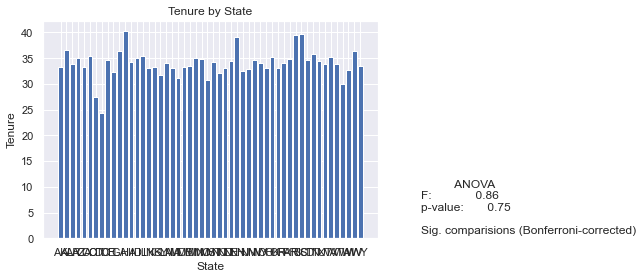

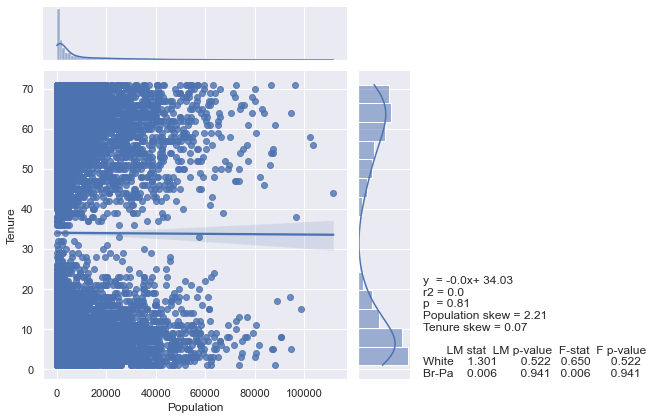

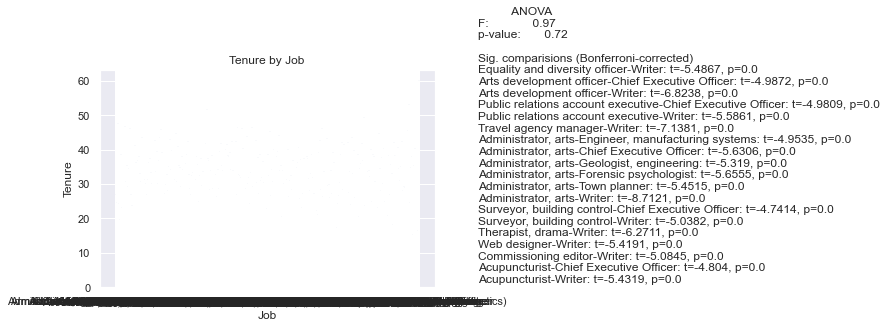

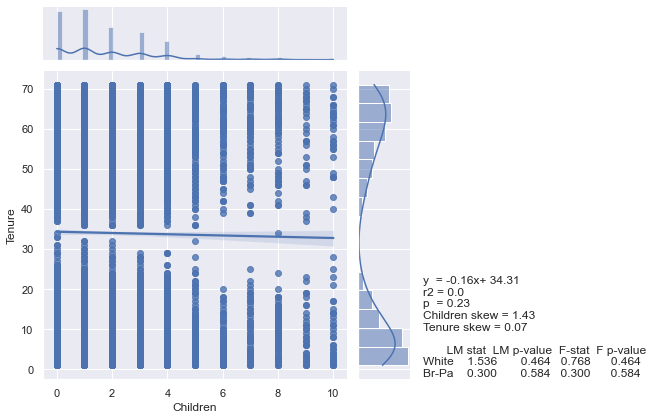

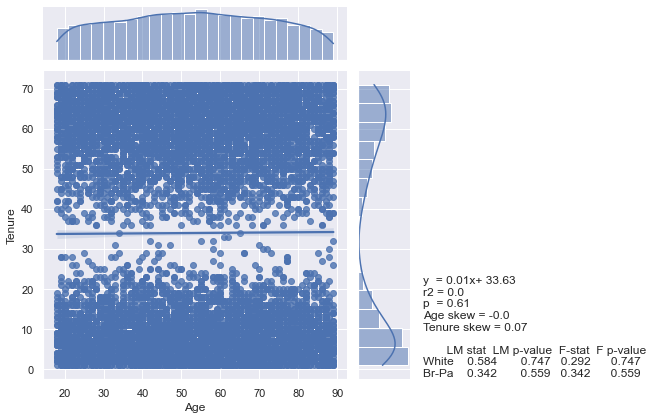

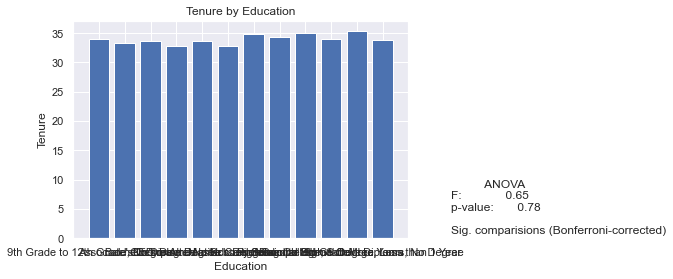

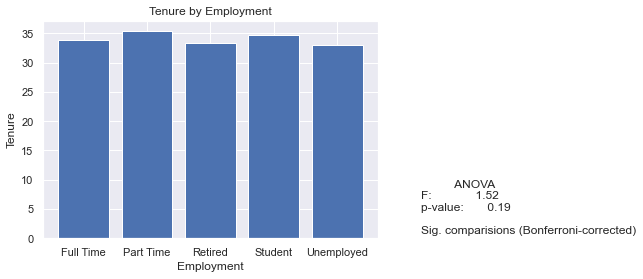

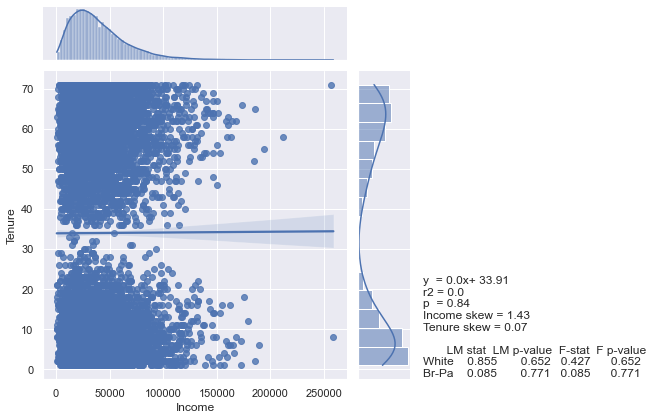

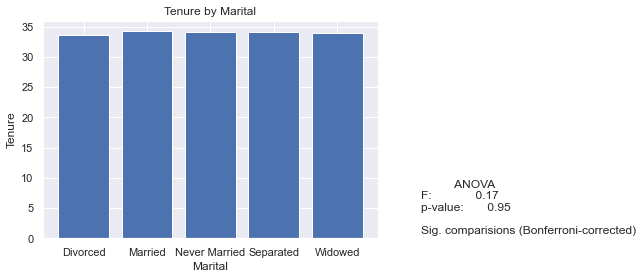

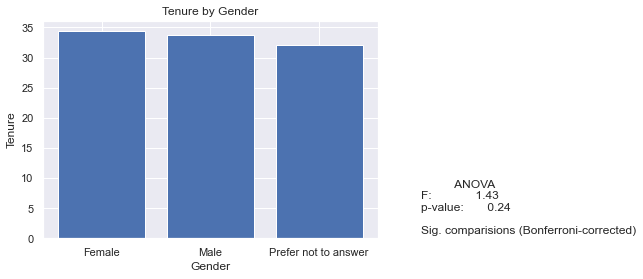

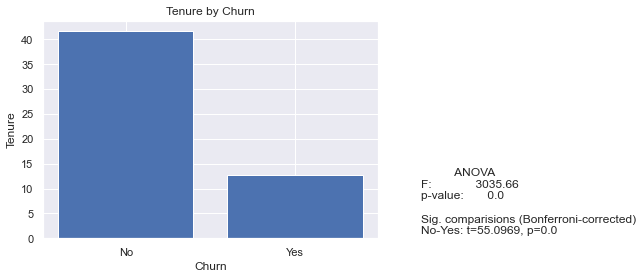

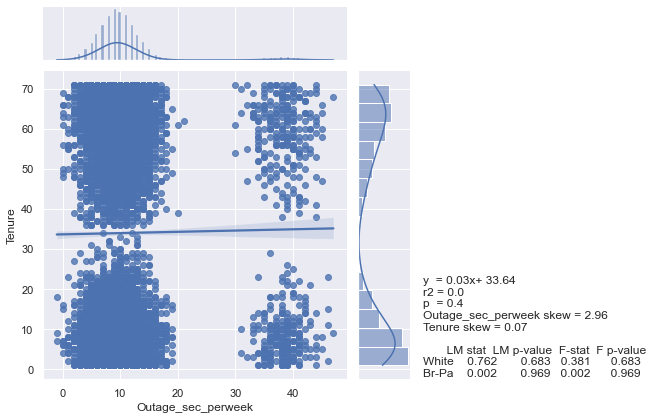

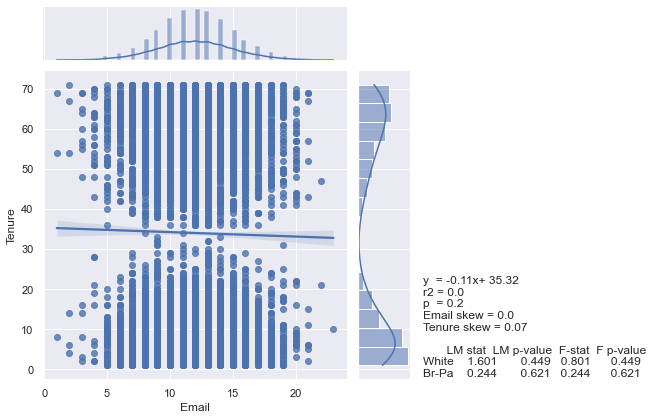

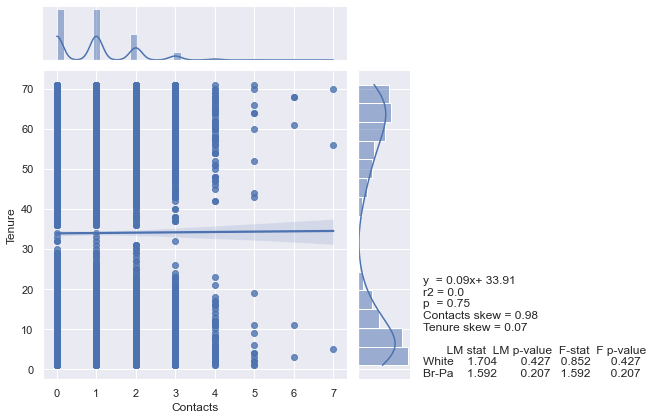

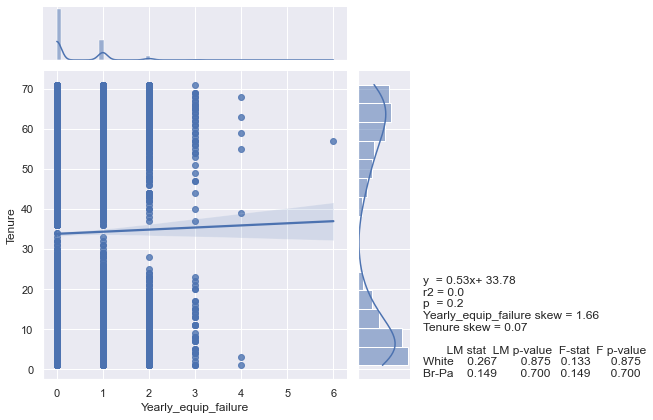

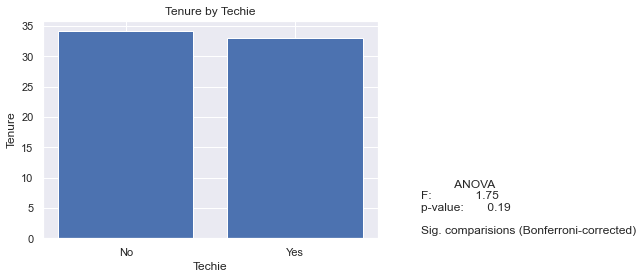

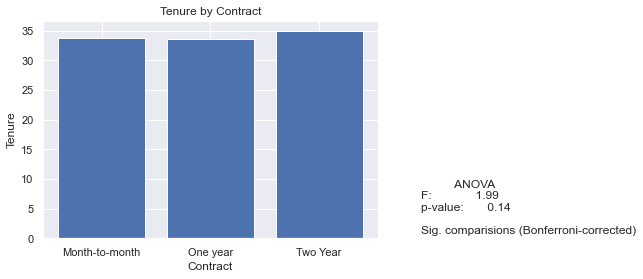

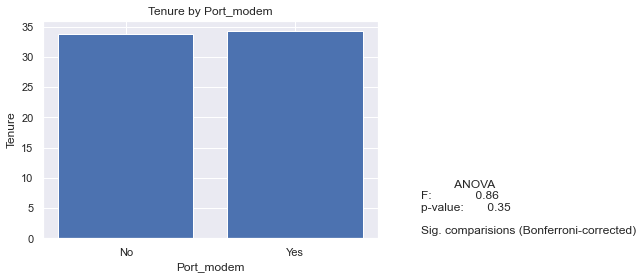

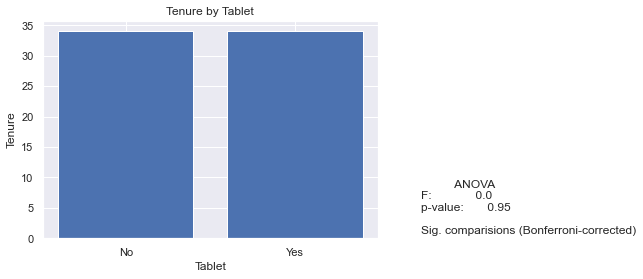

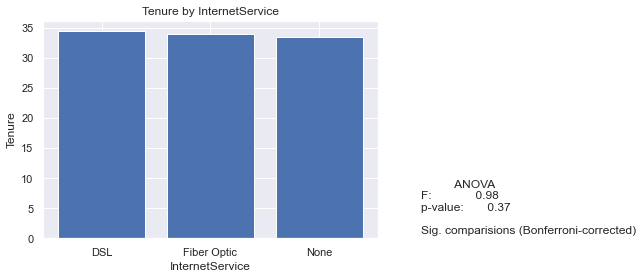

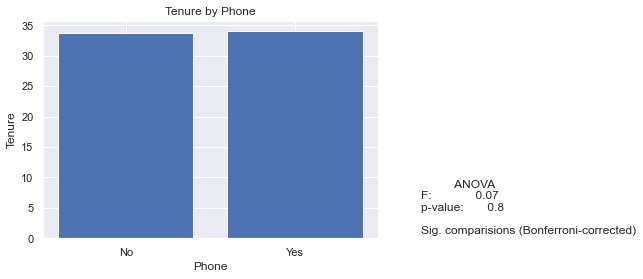

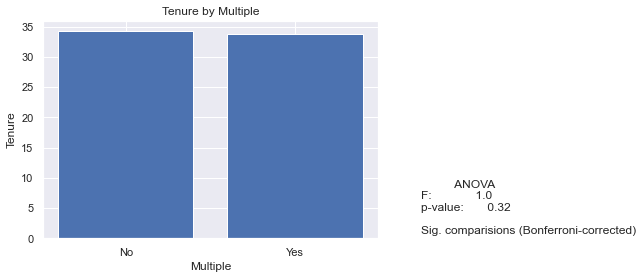

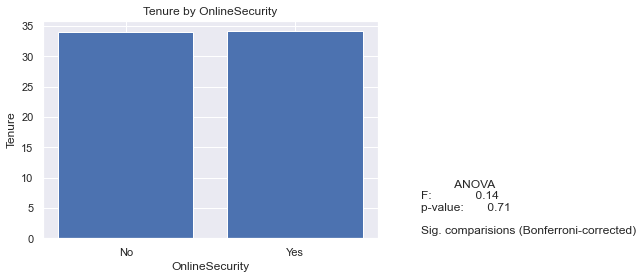

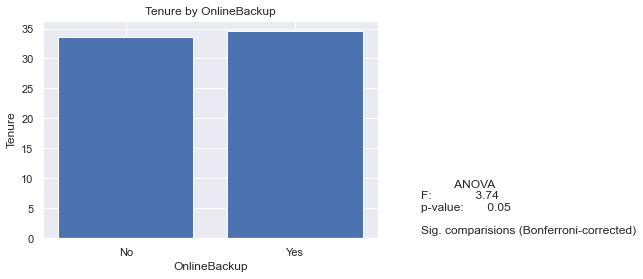

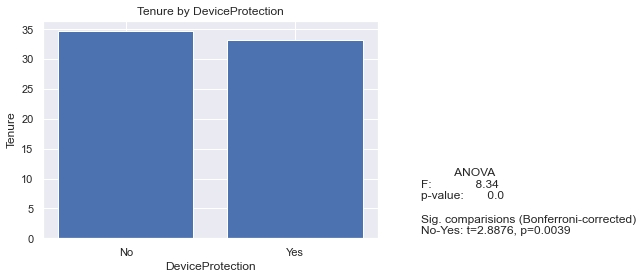

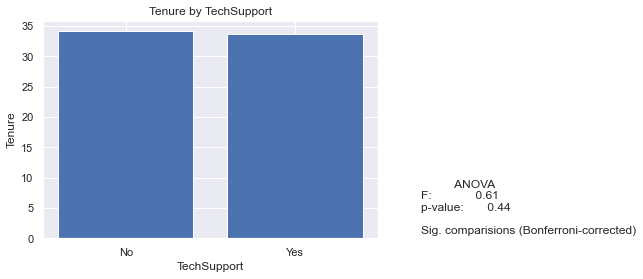

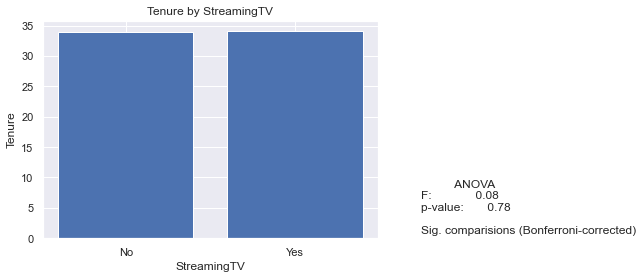

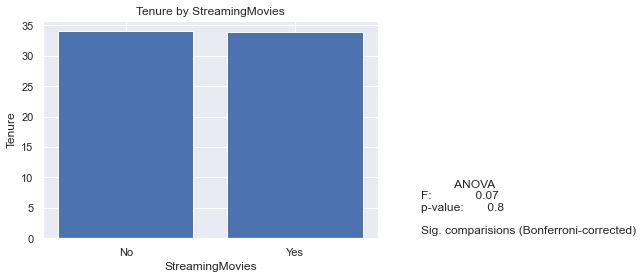

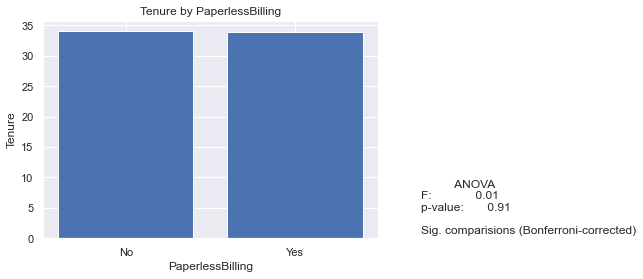

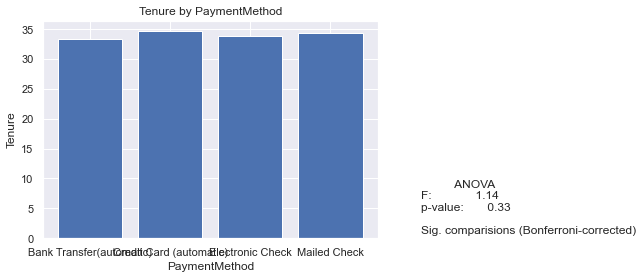

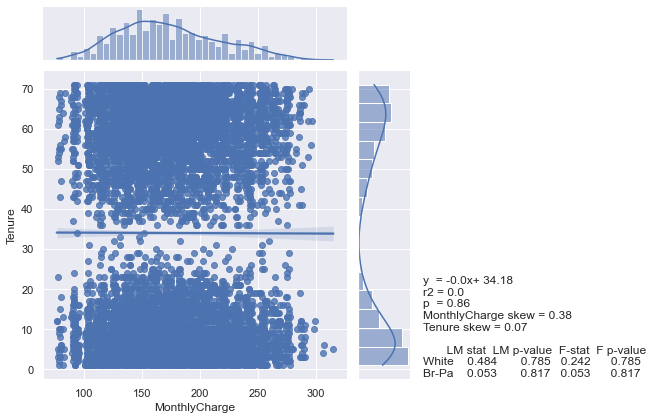

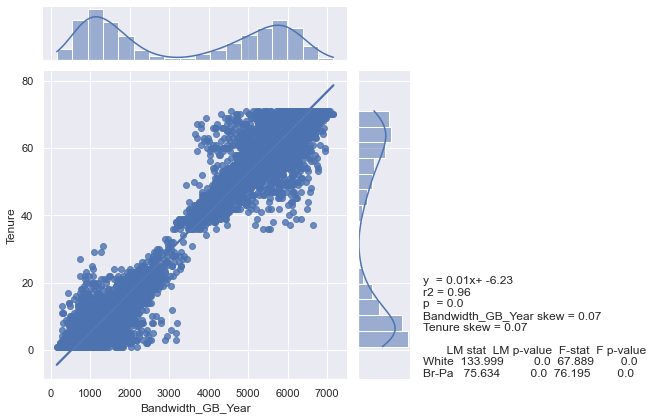

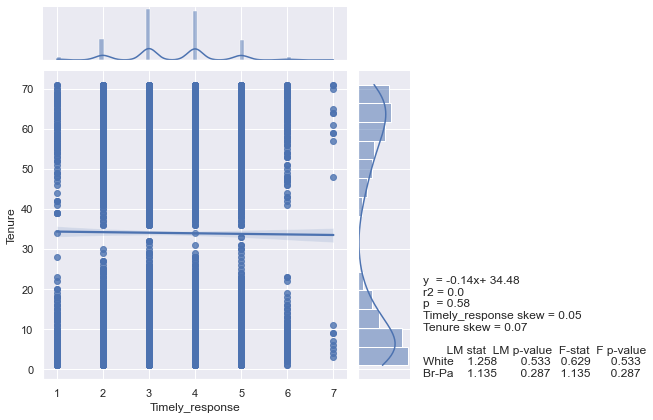

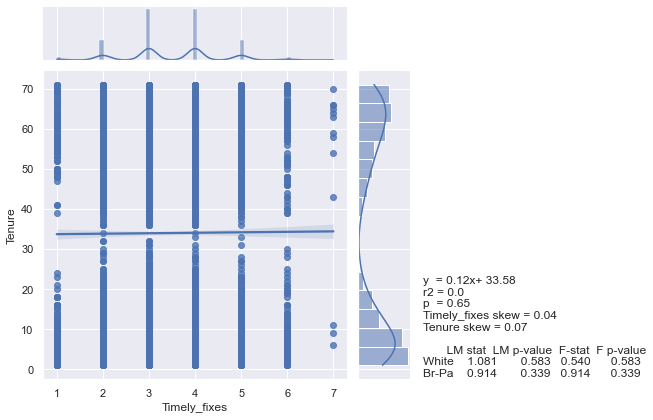

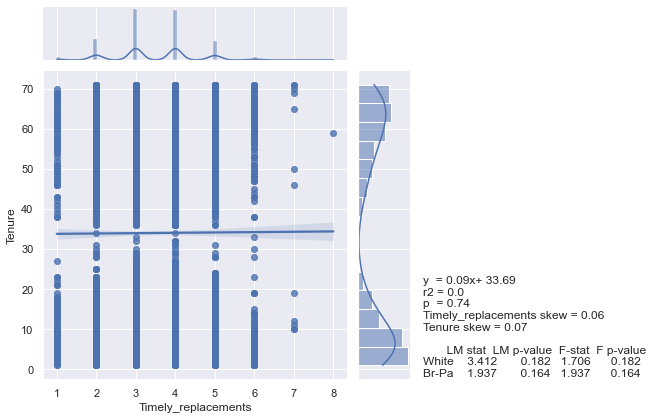

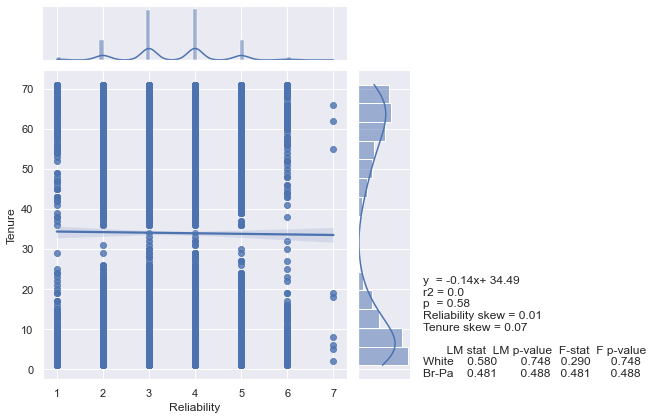

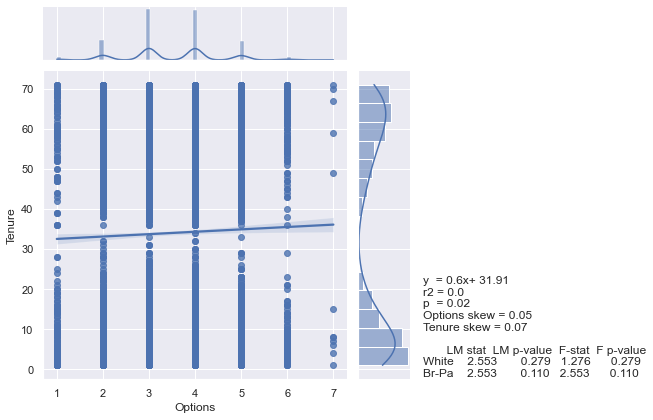

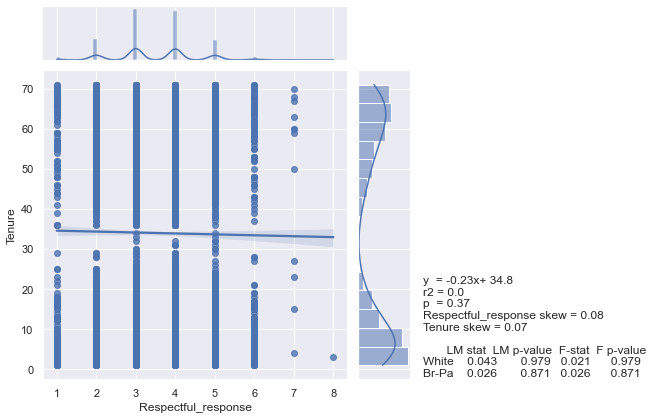

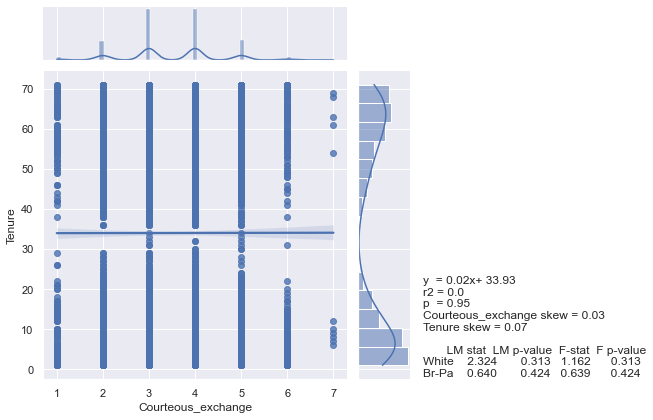

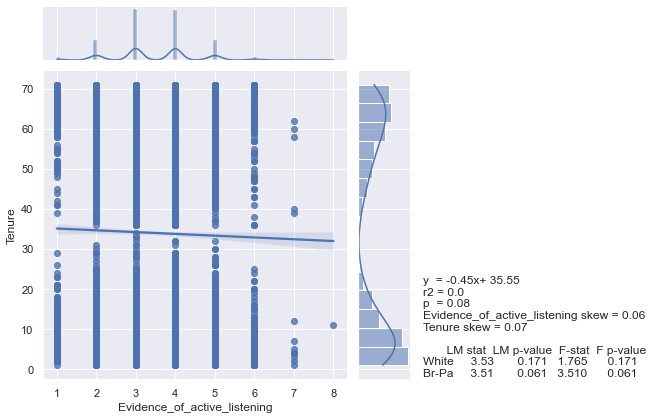

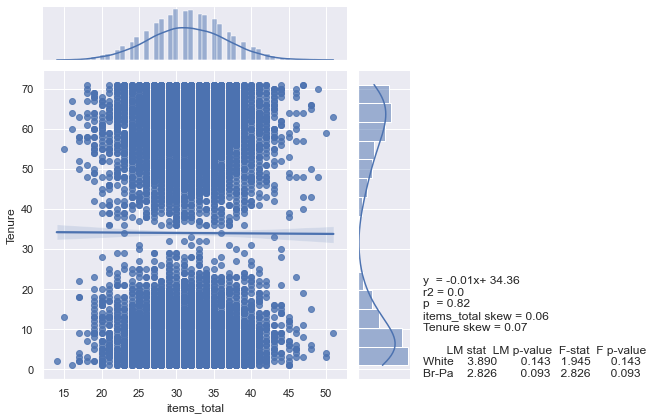

,Stat,r(+/1),Effect Size,p-value
Bandwidth_GB_Year,r,1.0,0.981,0.000000
Options,r,1.0,0.023,0.020861
Evidence_of_active_listening,r,-1.0,0.017,0.081779
Email,r,-1.0,0.013,0.202929
Yearly_equip_failure,r,1.0,0.013,0.204518
Children,r,-1.0,0.012,0.225822
Respectful_response,r,-1.0,0.009,0.366060
Outage_sec_perweek,r,1.0,0.008,0.399068
Timely_response,r,-1.0,0.006,0.579101
Reliability,r,-1.0,0.006,0.577361


In [13]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
def bivstats(df, label):
    from scipy import stats
    import pandas as pd
    import numpy as np
    
    #Create Empty dataframe to store output
    output_df = pd.DataFrame(columns=['Stat','r(+/1)', 'Effect Size','p-value'])
    
    for col in df:
        if not col == label:
            if df[col].isnull().sum()==0:
                if pd.api.types.is_numeric_dtype(df[col]): # only calculate r, p-value for the numeric 
                    r, p = stats.pearsonr(df[label], df[col])
                    output_df.loc[col] = ['r', np.sign(r), abs(round(r,3)), round(p,6)]
                    scatter(df[col], df[label])
                else:
                    F, p = anova(df[[col, label]], col, label)
                    output_df.loc[col] =  ['F', '', round(F,3), round(p,6)]
                    bar_chart(df, col, label)
            else:
                output_df.loc[col] = [np.nan, np.nan, np.nan, np.nan]
                
    return output_df.sort_values(by=['Stat','Effect Size'], ascending = [False, False])
    plt.show()
bivstats(df, 'Tenure')

ADDITIONAL ANAYSIS

In [14]:
# p-value significance filter
output = output_df['p-value'] > .5 
output_index = (output[:])
results = output_index  == output
results.shape

(41,)

In [15]:
def bivstats(df, label):
    from scipy import stats
    import pandas as pd
    import numpy as np
    
    global output_df
    #Create Empty dataframe to store output
    output_df = pd.DataFrame(columns=['Stat','r(+/1)', 'Effect Size','p-value'])
    
    for col in df:
        if not col == label:
            if df[col].isnull().sum()==0:
                if pd.api.types.is_numeric_dtype(df[col]): # only calculate r, p-value for the numeric 
                    r, p = stats.pearsonr(df[label], df[col])
                    output_df.loc[col] = ['r', np.sign(r), abs(round(r,3)>.4), round(6)>.5]
                else:
                    F, p = anova(df[[col, label]], col, label)
                    output_df.loc[col] =  ['F', '', round(F,3)>.4, round(p,6)>.5]
                    
                    
            else:
                output_df.loc[col] = [np.nan, np.nan, np.nan, np.nan]
                
    return output_df.sort_values(by=['p-value','Effect Size'], ascending = [False, False])
bivstats(df, 'Tenure')

,Stat,r(+/1),Effect Size,p-value
State,F,,True,True
Job,F,,True,True
Education,F,,True,True
Bandwidth_GB_Year,r,1.0,True,True
Population,r,-1.0,False,True
Children,r,-1.0,False,True
Age,r,1.0,False,True
Income,r,1.0,False,True
Marital,F,,False,True
Outage_sec_perweek,r,1.0,False,True


E1 Results of Analysis
List of features with a p value above significance level of .5 is 41 features which does not reduce or focus the analysis. Reviewing both p value level of .5 and effect size of .5 gives some statistical significance and focus of data to 4 features State, Job, Education, and Bandwidth_GB_Year. This highlights the categorical weight that finance[state, job and education] play as a part along with Bandwidth. Overall when looking at univariate statistics there are stronger correlations to draw but this combinatino of categorical and Continious highlights that while Financial status(assumed by features indicated) plays a factor Bandwidth usage has a moderate relationship and both can be considered when reviewing Churn. 

E2 Limitations of Analysis
The focus of Bivariate analysis and not diving deeper into Multivariate Analysis gives us limited insight. 
Next steps should include comparing correlations between all combinations of continuous data with size and hue representing the effect size of categorical information. 

E3 Recommended Course of Action
By reviewing univariate and bivariate outputs of p values and effect size we can determine that economic and bandwidth usage plays a significant factor in Churn. From this we can create personas and possible regional plans or business partnership to cater to lower incomes while increasing loyalty with faster bandwidth througput. 
